## 获取文本语料库
### 古腾堡语料库
代表既定的文学。

这个语料库中的文件标识符。

In [1]:
%matplotlib inline
import nltk
from nltk.corpus import gutenberg
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

找出emma包含多少个词。

In [9]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

统计每个文本的3个统计量：平均词长、平均句子长度和文本中每个词出现的平均次数（词汇多样性得分）。

In [10]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


sents()函数把文本划分成句子，其中每一个句子是一个词链表。

In [11]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[[u'[', u'The', u'Tragedie', u'of', u'Macbeth', u'by', u'William', u'Shakespeare', u'1603', u']'], [u'Actus', u'Primus', u'.'], ...]

In [12]:
macbeth_sentences[1037]

[u'Good',
 u'night',
 u',',
 u'and',
 u'better',
 u'health',
 u'Attend',
 u'his',
 u'Maiesty']

In [28]:
longest_len = max([len(s) for s in macbeth_sentences])
longest_len

158

In [31]:
[s for s in macbeth_sentences if len(s) == longest_len][0][:10]

[u'Doubtfull',
 u'it',
 u'stood',
 u',',
 u'As',
 u'two',
 u'spent',
 u'Swimmers',
 u',',
 u'that']

### 网络和聊天文本
非正式的语言。

In [14]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print fileid, webtext.raw(fileid)[:65], '...'

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


即时消息聊天会话语料库：

In [15]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

[u'i',
 u'do',
 u"n't",
 u'want',
 u'hot',
 u'pics',
 u'of',
 u'a',
 u'female',
 u',',
 u'I',
 u'can',
 u'look',
 u'in',
 u'a',
 u'mirror',
 u'.']

### 布朗语料库
包含500个不同来源的文本，按照文体分类，如新闻、社论等。

In [16]:
from nltk.corpus import brown
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [17]:
brown.words(categories='news')

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [18]:
brown.words(fileids=['cg22'])

[u'Does', u'our', u'society', u'have', u'a', ...]

In [19]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.'], [u'The', u'jury', u'further', u'said', u'in', u'term-end', u'presentments', u'that', u'the', u'City', u'Executive', u'Committee', u',', u'which', u'had', u'over-all', u'charge', u'of', u'the', u'election', u',', u'``', u'deserves', u'the', u'praise', u'and', u'thanks', u'of', u'the', u'City', u'of', u'Atlanta', u"''", u'for', u'the', u'manner', u'in', u'which', u'the', u'election', u'was', u'conducted', u'.'], ...]

布朗语料库是一个研究文体之间的系统性差异（又叫做`stylistics`文体学的语言学研究）的资源。第一步：对特定文体进行计数。

In [20]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print m + ':', fdist[m],

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389


统计每一个感兴趣的文体。

In [21]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


观察发现新闻文体中最常见的情态动词是will，而言情文体中最常见的情态动词是could。

### 路透社语料库
路透社语料库包含10788个新闻文档，共计130万字。这些文档分成90个主题，按照“训练”和“测试”分为两组。

In [23]:
from nltk.corpus import reuters
reuters.fileids()[:10]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

In [32]:
reuters.categories()

[u'acq',
 u'alum',
 u'barley',
 u'bop',
 u'carcass',
 u'castor-oil',
 u'cocoa',
 u'coconut',
 u'coconut-oil',
 u'coffee',
 u'copper',
 u'copra-cake',
 u'corn',
 u'cotton',
 u'cotton-oil',
 u'cpi',
 u'cpu',
 u'crude',
 u'dfl',
 u'dlr',
 u'dmk',
 u'earn',
 u'fuel',
 u'gas',
 u'gnp',
 u'gold',
 u'grain',
 u'groundnut',
 u'groundnut-oil',
 u'heat',
 u'hog',
 u'housing',
 u'income',
 u'instal-debt',
 u'interest',
 u'ipi',
 u'iron-steel',
 u'jet',
 u'jobs',
 u'l-cattle',
 u'lead',
 u'lei',
 u'lin-oil',
 u'livestock',
 u'lumber',
 u'meal-feed',
 u'money-fx',
 u'money-supply',
 u'naphtha',
 u'nat-gas',
 u'nickel',
 u'nkr',
 u'nzdlr',
 u'oat',
 u'oilseed',
 u'orange',
 u'palladium',
 u'palm-oil',
 u'palmkernel',
 u'pet-chem',
 u'platinum',
 u'potato',
 u'propane',
 u'rand',
 u'rape-oil',
 u'rapeseed',
 u'reserves',
 u'retail',
 u'rice',
 u'rubber',
 u'rye',
 u'ship',
 u'silver',
 u'sorghum',
 u'soy-meal',
 u'soy-oil',
 u'soybean',
 u'strategic-metal',
 u'sugar',
 u'sun-meal',
 u'sun-oil',
 u'su

与布朗语料库不同，路透社语料库的类别时候互相重叠的，因为新闻报道往往涉及多个主题。

In [33]:
reuters.categories('training/9865')

[u'barley', u'corn', u'grain', u'wheat']

In [34]:
reuters.categories(['training/9865', 'training/9880'])

[u'barley', u'corn', u'grain', u'money-fx', u'wheat']

In [35]:
reuters.fileids('barley')

[u'test/15618',
 u'test/15649',
 u'test/15676',
 u'test/15728',
 u'test/15871',
 u'test/15875',
 u'test/15952',
 u'test/17767',
 u'test/17769',
 u'test/18024',
 u'test/18263',
 u'test/18908',
 u'test/19275',
 u'test/19668',
 u'training/10175',
 u'training/1067',
 u'training/11208',
 u'training/11316',
 u'training/11885',
 u'training/12428',
 u'training/13099',
 u'training/13744',
 u'training/13795',
 u'training/13852',
 u'training/13856',
 u'training/1652',
 u'training/1970',
 u'training/2044',
 u'training/2171',
 u'training/2172',
 u'training/2191',
 u'training/2217',
 u'training/2232',
 u'training/3132',
 u'training/3324',
 u'training/395',
 u'training/4280',
 u'training/4296',
 u'training/5',
 u'training/501',
 u'training/5467',
 u'training/5610',
 u'training/5640',
 u'training/6626',
 u'training/7205',
 u'training/7579',
 u'training/8213',
 u'training/8257',
 u'training/8759',
 u'training/9865',
 u'training/9958']

In [37]:
reuters.fileids(['barley', 'corn'])[:10]

[u'test/14832',
 u'test/14858',
 u'test/15033',
 u'test/15043',
 u'test/15106',
 u'test/15287',
 u'test/15341',
 u'test/15618',
 u'test/15648',
 u'test/15649']

In [38]:
reuters.words('training/9865')[:14]

[u'FRENCH',
 u'FREE',
 u'MARKET',
 u'CEREAL',
 u'EXPORT',
 u'BIDS',
 u'DETAILED',
 u'French',
 u'operators',
 u'have',
 u'requested',
 u'licences',
 u'to',
 u'export']

In [39]:
reuters.words(['training/9865', 'training/9880'])

[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', ...]

In [40]:
reuters.words(categories='barley')

[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', ...]

In [41]:
reuters.words(categories=['barley', 'corn'])

[u'THAI', u'TRADE', u'DEFICIT', u'WIDENS', u'IN', ...]

### 就职演说语料库
语料库实际上是55个文本的集合，每个文本都是一个总统的演说。这个集合的一个显著特性是时间维度。

In [3]:
from nltk.corpus import inaugural
inaugural.fileids()

[u'1789-Washington.txt',
 u'1793-Washington.txt',
 u'1797-Adams.txt',
 u'1801-Jefferson.txt',
 u'1805-Jefferson.txt',
 u'1809-Madison.txt',
 u'1813-Madison.txt',
 u'1817-Monroe.txt',
 u'1821-Monroe.txt',
 u'1825-Adams.txt',
 u'1829-Jackson.txt',
 u'1833-Jackson.txt',
 u'1837-VanBuren.txt',
 u'1841-Harrison.txt',
 u'1845-Polk.txt',
 u'1849-Taylor.txt',
 u'1853-Pierce.txt',
 u'1857-Buchanan.txt',
 u'1861-Lincoln.txt',
 u'1865-Lincoln.txt',
 u'1869-Grant.txt',
 u'1873-Grant.txt',
 u'1877-Hayes.txt',
 u'1881-Garfield.txt',
 u'1885-Cleveland.txt',
 u'1889-Harrison.txt',
 u'1893-Cleveland.txt',
 u'1897-McKinley.txt',
 u'1901-McKinley.txt',
 u'1905-Roosevelt.txt',
 u'1909-Taft.txt',
 u'1913-Wilson.txt',
 u'1917-Wilson.txt',
 u'1921-Harding.txt',
 u'1925-Coolidge.txt',
 u'1929-Hoover.txt',
 u'1933-Roosevelt.txt',
 u'1937-Roosevelt.txt',
 u'1941-Roosevelt.txt',
 u'1945-Roosevelt.txt',
 u'1949-Truman.txt',
 u'1953-Eisenhower.txt',
 u'1957-Eisenhower.txt',
 u'1961-Kennedy.txt',
 u'1965-Johnson.tx

In [4]:
[fileid[:4] for fileid in inaugural.fileids()]

[u'1789',
 u'1793',
 u'1797',
 u'1801',
 u'1805',
 u'1809',
 u'1813',
 u'1817',
 u'1821',
 u'1825',
 u'1829',
 u'1833',
 u'1837',
 u'1841',
 u'1845',
 u'1849',
 u'1853',
 u'1857',
 u'1861',
 u'1865',
 u'1869',
 u'1873',
 u'1877',
 u'1881',
 u'1885',
 u'1889',
 u'1893',
 u'1897',
 u'1901',
 u'1905',
 u'1909',
 u'1913',
 u'1917',
 u'1921',
 u'1925',
 u'1929',
 u'1933',
 u'1937',
 u'1941',
 u'1945',
 u'1949',
 u'1953',
 u'1957',
 u'1961',
 u'1965',
 u'1969',
 u'1973',
 u'1977',
 u'1981',
 u'1985',
 u'1989',
 u'1993',
 u'1997',
 u'2001',
 u'2005',
 u'2009']

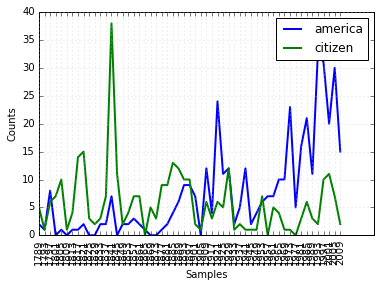

In [5]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen'] if w.lower().startswith(target))
cfd.plot()

Figure 2-1. Plot of a conditional frequency distribution: All words in the Inaugural Address Corpus that begin with america or citizen are counted; separate counts are kept for each address; these are plotted so that trends in usage over time can be observed; counts are not normalized for document length.

### 其他语言的语料库
多国语言的语料库。

In [6]:
nltk.corpus.cess_esp.words()

[u'El', u'grupo', u'estatal', ...]

In [7]:
nltk.corpus.floresta.words()

[u'Um', u'revivalismo', u'refrescante', u'O', ...]

In [8]:
nltk.corpus.indian.words('hindi.pos')

[u'\u092a\u0942\u0930\u094d\u0923', u'\u092a\u094d\u0930\u0924\u093f\u092c\u0902\u0927', ...]

In [10]:
nltk.corpus.udhr.fileids()[:10]

[u'Abkhaz-Cyrillic+Abkh',
 u'Abkhaz-UTF8',
 u'Achehnese-Latin1',
 u'Achuar-Shiwiar-Latin1',
 u'Adja-UTF8',
 u'Afaan_Oromo_Oromiffa-Latin1',
 u'Afrikaans-Latin1',
 u'Aguaruna-Latin1',
 u'Akuapem_Twi-UTF8',
 u'Albanian_Shqip-Latin1']

In [11]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

[u'Saben', u'umat', u'manungsa', u'lair', u'kanthi', ...]

udhr包含有超过300种语言的世界人权宣言。利用条件频率分布研究udhr语料库中不同语言版本中之长的差异。

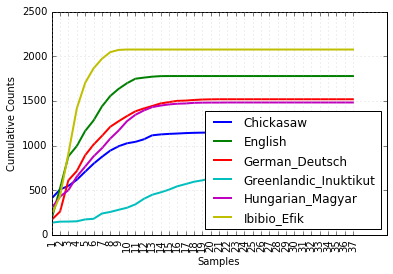

In [12]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

Figure 2-2. Cumulative word length distributions: Six translations of the Universal Declaration of Human Rights are processed; this graph shows that words having five or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text.

### 文本语料库的结构
![2-3](https://www.safaribooksonline.com/library/view/natural-language-processing/9780596803346/httpatomoreillycomsourceoreillyimages302020.png)

Figure 2-3. Common structures for text corpora: The simplest kind of corpus is a collection of isolated texts with no particular organization; some corpora are structured into categories, such as genre (Brown Corpus); some categorizations overlap, such as topic categories (Reuters Corpus); other corpora represent language use over time (Inaugural Address Corpus).

Table 2-3. Basic corpus functionality defined in NLTK: More documentation can be found using help(nltk.corpus.reader) and by reading the online Corpus HOWTO at http://www.nltk.org/howto.

| Example | Description |
| ------- | ----------- |
| fileids() | The files of the corpus |
| fileids([categories]) | The files of the corpus corresponding to these categories |
| categories() | The categories of the corpus |
| categories([fileids]) | The categories of the corpus corresponding to these files |
| raw() | The raw content of the corpus |
| raw(fileids=[f1,f2,f3]) | The raw content of the specified files |
| raw(categories=[c1,c2]) | The raw content of the specified categories |
| words() | The words of the whole corpus |
| words(fileids=[f1,f2,f3]) | The words of the specified fileids |
| words(categories=[c1,c2]) | The words of the specified categories |
| sents() | The sentences of the specified categories |
| sents(fileids=[f1,f2,f3]) | The sentences of the specified fileids |
| sents(categories=[c1,c2]) | The sentences of the specified categories |
| abspath(fileid) | The location of the given file on disk |
| encoding(fileid) | The encoding of the file (if known) |
| open(fileid) | Open a stream for reading the given corpus file |
| root() | The path to the root of locally installed corpus |
| readme() | The contents of the README file of the corpus |

### 载入你自己的语料库
txt文件载入。

In [13]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['README', 'connectives', 'propernames', 'web2', 'web2a', 'words']

In [14]:
wordlists.words('connectives')

[u'the', u'of', u'and', u'to', u'a', u'in', u'that', ...]

载入宾州树库的副本。

```py
>>> from nltk.corpus import BracketParseCorpusReader
>>> corpus_root = r"C:\corpora\penntreebank\parsed\mrg\wsj"
>>> file_pattern = r".*/wsj_.*\.mrg"
>>> ptb = BracketParseCorpusReader(corpus_root, file_pattern)
>>> ptb.fileids()
['00/wsj_0001.mrg', '00/wsj_0002.mrg', '00/wsj_0003.mrg', '00/wsj_0004.mrg', ...]
>>> len(ptb.sents())
49208
>>> ptb.sents(fileids='20/wsj_2013.mrg')[19]
['The', '55-year-old', 'Mr.', 'Noriega', 'is', "n't", 'as', 'smooth', 'as', 'the',
'shah', 'of', 'Iran', ',', 'as', 'well-born', 'as', 'Nicaragua', "'s", 'Anastasio',
'Somoza', ',', 'as', 'imperial', 'as', 'Ferdinand', 'Marcos', 'of', 'the', 'Philippines',
'or', 'as', 'bloody', 'as', 'Haiti', "'s", 'Baby', Doc', 'Duvalier', '.']
```